In [1]:
import numpy as np
import paddle

## Tensor的操作

In [2]:
"""通过索引和切片方式可访问和修改Tensor

- 飞浆使用标准的 Python 索引规则与 Numpy 索引规则
- 基于0-n的下标进行索引，如果下标为负数，则从尾部开始计算
- 通过冒号分割切片参数，start:stop:step 来进行切片操作
"""

# 针对多维Tensor，则会有多个维度上的索引或切片
t = paddle.to_tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

t

Tensor(shape=[3, 3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [5]:
t[0:2, 0:2].numpy() # 转换为numpy数组

array([[1, 2],
       [4, 5]], dtype=int64)

In [7]:
# 针对一维Tensor，仅有单个维度上的索引或切片
t1 = paddle.to_tensor(np.arange(10))

# 取Tensor翻转后的值
t1[::-1].numpy()

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

飞桨还提供了丰富的 Tensor 操作的 API，包括数学运算、逻辑运算、线性代数等 100 余种 API，这些 API 调用有两种方法

In [9]:
x = paddle.to_tensor([[1.1, 2.2], [3.3, 4.4]], dtype='float64')
y = paddle.to_tensor([[5.5, 6.6], [7.7, 8.8]], dtype='float64')

# 使用Paddle的API
paddle.add(x, y)

Tensor(shape=[2, 2], dtype=float64, place=Place(cpu), stop_gradient=True,
       [[6.60000000 , 8.80000000 ],
        [11.        , 13.20000000]])

In [10]:
# 使用类成员函数
x.add(y)

Tensor(shape=[2, 2], dtype=float64, place=Place(cpu), stop_gradient=True,
       [[6.60000000 , 8.80000000 ],
        [11.        , 13.20000000]])

### 数学运算

- x.abs()                       #逐元素取绝对值
- x.ceil()                      #逐元素向上取整
- x.floor()                     #逐元素向下取整
- x.round()                     #逐元素四舍五入
- x.exp()                       #逐元素计算自然常数为底的指数
- x.log()                       #逐元素计算 x 的自然对数
- x.reciprocal()                #逐元素求倒数
- x.square()                    #逐元素计算平方
- x.sqrt()                      #逐元素计算平方根
- x.sin()                       #逐元素计算正弦
- x.cos()                       #逐元素计算余弦
- x.add(y)                      #逐元素相加
- x.subtract(y)                 #逐元素相减
- x.multiply(y)                 #逐元素相乘
- x.divide(y)                   #逐元素相除
- x.mod(y)                      #逐元素相除并取余
- x.pow(y)                      #逐元素幂运算
- x.max()                       #指定维度上元素最大值，默认为全部维度
- x.min()                       #指定维度上元素最小值，默认为全部维度
- x.prod()                      #指定维度上元素累乘，默认为全部维度
- x.sum()                       #指定维度上元素的和，默认为全部维度

### 逻辑运算

- x.isfinite()                  #判断 Tensor 中元素是否是有限的数字，即不包括 inf 与 nan
- x.equal_all(y)                #判断两个 Tensor 的全部元素是否相等，并返回形状为[]的布尔类 0-D Tensor
- x.equal(y)                    #判断两个 Tensor 的每个元素是否相等，并返回形状相同的布尔类 Tensor
- x.not_equal(y)                #判断两个 Tensor 的每个元素是否不相等
- x.less_than(y)                #判断 Tensor x 的元素是否小于 Tensor y 的对应元素
- x.less_equal(y)               #判断 Tensor x 的元素是否小于或等于 Tensor y 的对应元素
- x.greater_than(y)             #判断 Tensor x 的元素是否大于 Tensor y 的对应元素
- x.greater_equal(y)            #判断 Tensor x 的元素是否大于或等于 Tensor y 的对应元素
- x.allclose(y)                 #判断 Tensor x 的全部元素是否与 Tensor y 的全部元素接近，并返回形状为[]的布尔类 0-D Tensor

### 线性代数

- x.t()                         #矩阵转置
- x.transpose([1, 0])           #交换第 0 维与第 1 维的顺序
- x.norm('fro')                 #矩阵的弗罗贝尼乌斯范数
- x.dist(y, p=2)                #矩阵（x-y）的 2 范数
- x.matmul(y)                   #矩阵乘法

In [12]:
x = paddle.to_tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

Tensor(shape=[3, 3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [13]:
x.t()

Tensor(shape=[3, 3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

## Tensor的广播机制

在深度学习任务中，有时需要使用较小形状的 Tensor 与较大形状的 Tensor 执行计算，广播机制就是将较小形状的 Tensor 扩展到与较大形状的 Tensor 一样的形状，便于匹配计算，同时又没有对较小形状 Tensor 进行数据拷贝操作，从而提升算法实现的运算效率。 

飞浆的广播(Broadcasting)机制主要遵循如下规则：

- 每个 Tensor 至少为一维 Tensor
- 从最后一个维度向前开始比较两个 Tensor 的形状，需要满足如下条件才能进行广播：两个 Tensor 的维度大小相等；或者其中一个 Tensor 的维度等于 1；或者其中一个 Tensor 的维度不存在

In [14]:
x = paddle.ones((2, 3, 1, 5))
y = paddle.ones((3, 4, 1))

# 从最后一个维度向前依次比较：
# 第一次：y 的维度大小是 1
# 第二次：x 的维度大小是 1
# 第三次：x 和 y 的维度大小相等
# 第四次：y 的维度不存在
# 所以 x 和 y 是可以广播的

z = x + y

z

Tensor(shape=[2, 3, 4, 5], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]]],


        [[[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]]]])

两个 Tensor 进行广播后的结果 Tensor 的形状计算规则如下:

- 如果两个 Tensor 的形状的长度不一致，会在较小长度的形状矩阵前部添加 1，直到两个 Tensor 的形状长度相等
- 保证两个 Tensor 形状相等之后，每个维度上的结果维度就是当前维度上的较大值

In [16]:
x = paddle.ones((2, 1, 4))
y = paddle.ones((3, 1))

# y 的形状长度为 2，小于 x 的形状长度 3，因此会在 y 的形状前部添加 1，结果就是 y 的形状变为[1, 3, 1]
# z 的形状: [2,3,4]，z 的每一维度上的尺寸，将取 x 和 y 对应维度上尺寸的较大值，
# 如第 0 维 x 的尺寸为 2，y 的尺寸为 1，则 z 的第 0 维尺寸为 2
z = x + y
z

Tensor(shape=[2, 3, 4], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]])

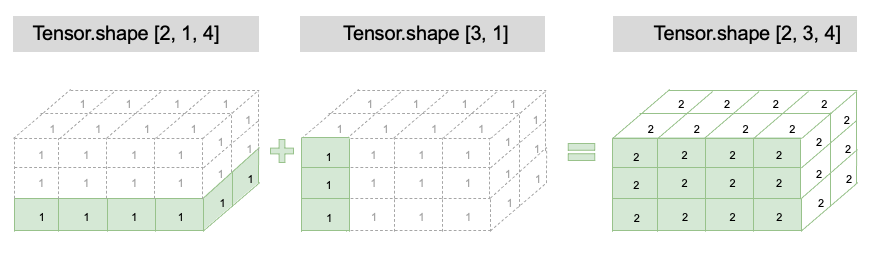